In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
boston = pd.read_csv('C:/Users/yongchae/Desktop/SKN/BostonHousing.csv', encoding = 'utf-8')

In [4]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [5]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


<Axes: xlabel='MEDV', ylabel='Count'>

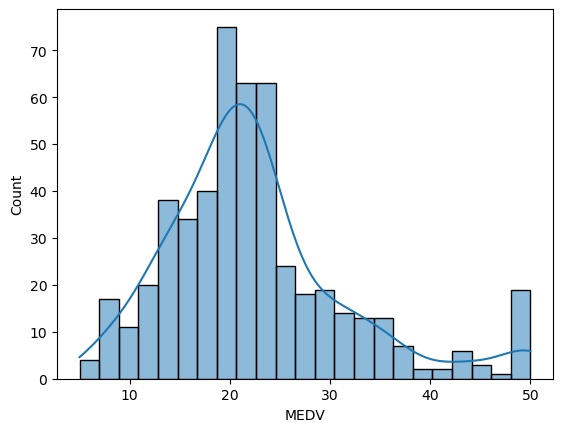

In [53]:
sns.histplot(boston['MEDV'], kde=True)

<Axes: >

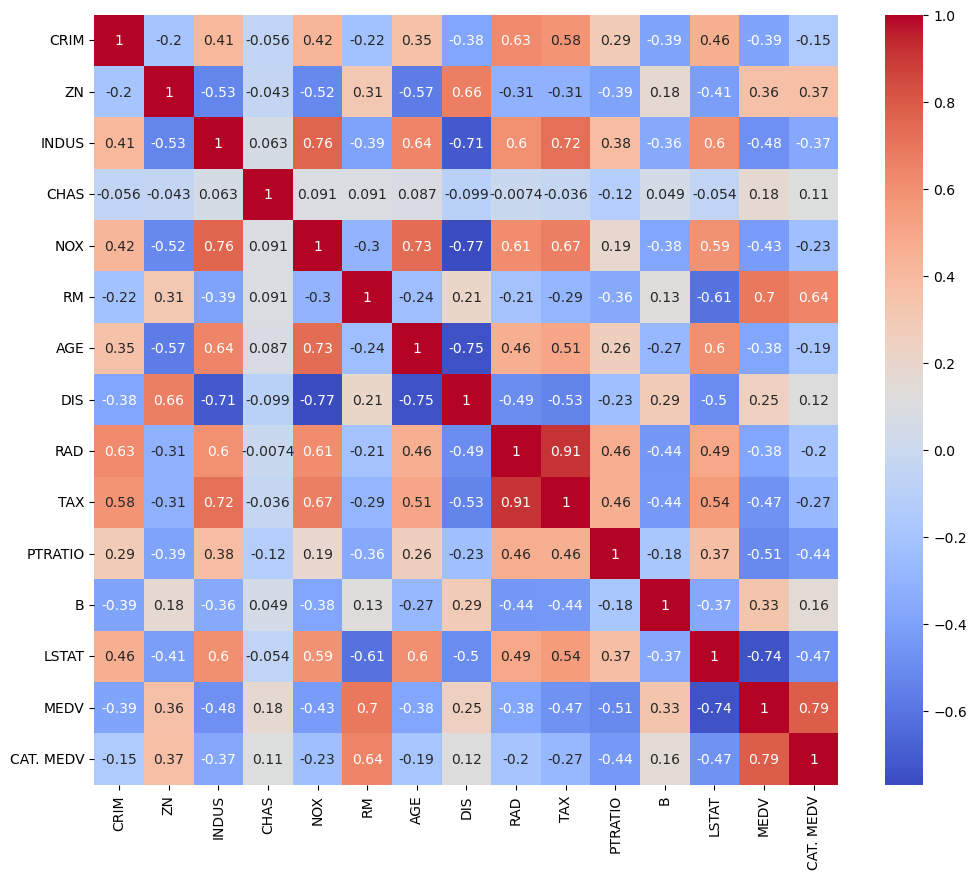

In [54]:
plt.figure(figsize=(12,10))
sns.heatmap(boston.corr(), annot=True, cmap='coolwarm')

In [55]:
bin_var = ['CHAS']
exclude_cols = ['CHAS', 'MEDV', 'CAT. MEDV']
num_vari = [col for col in boston.columns if col not in exclude_cols]

In [56]:
num_vari

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

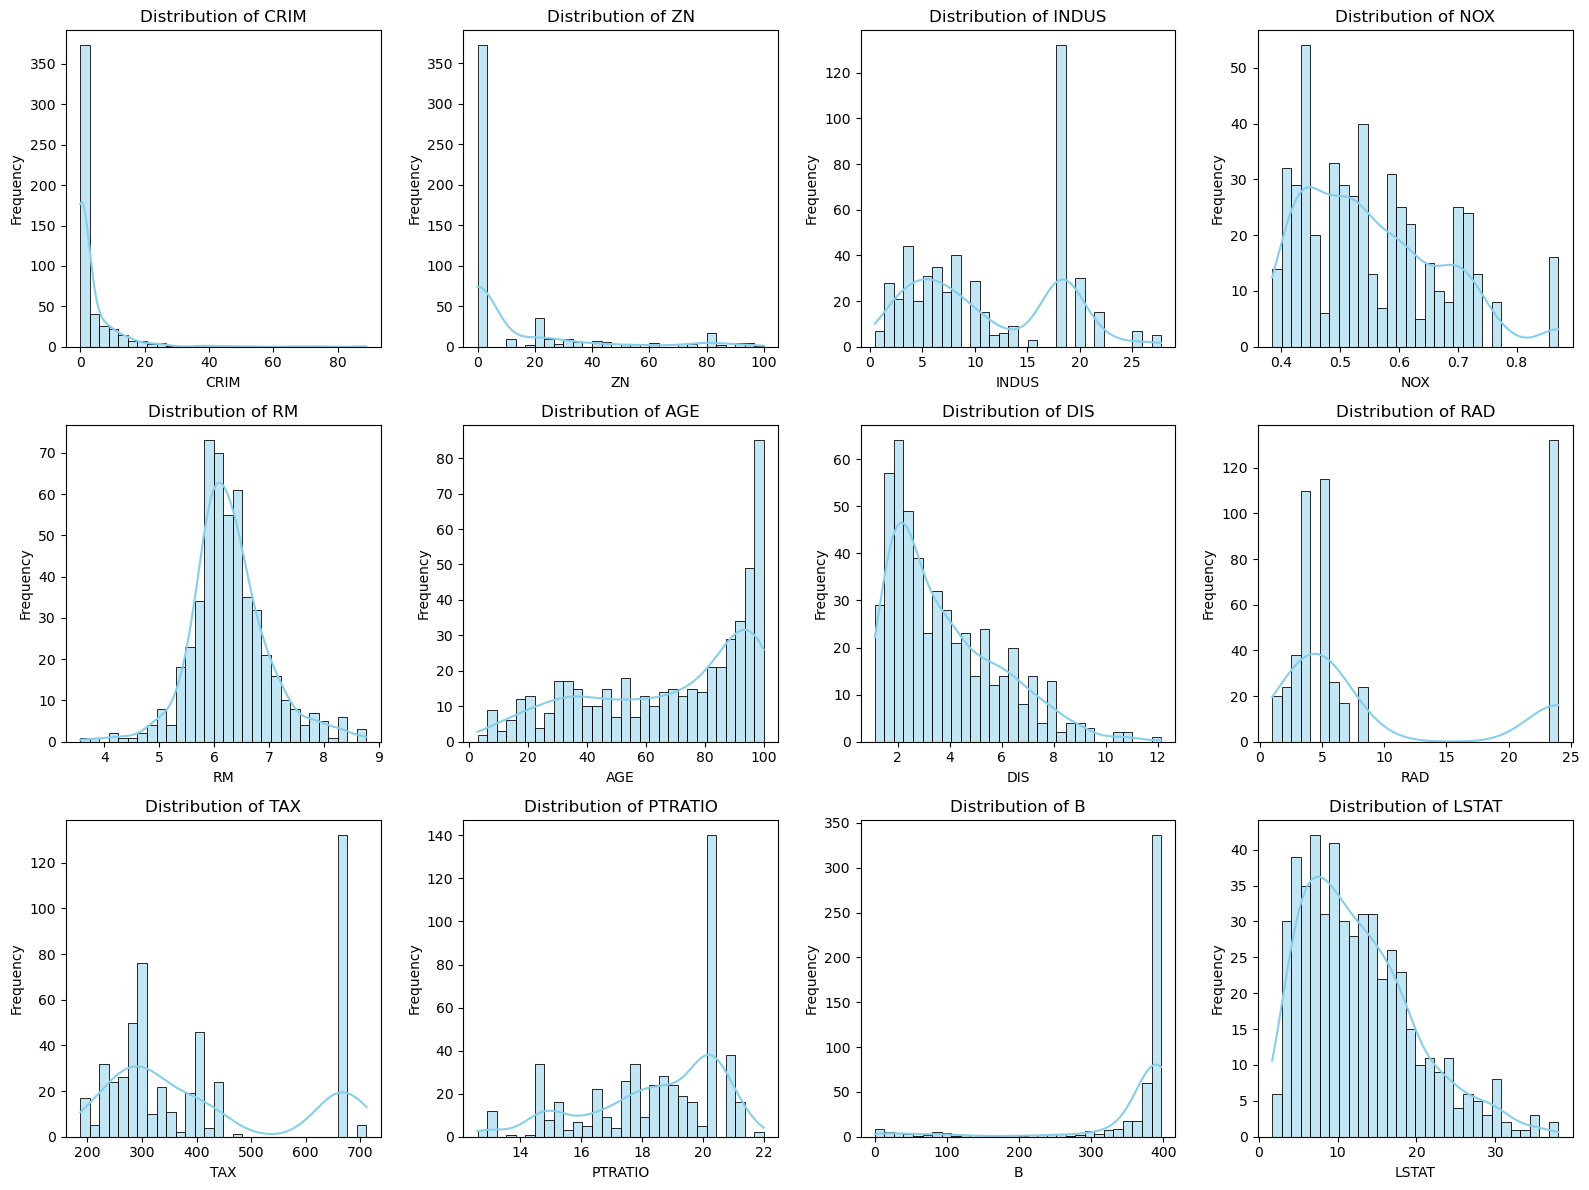

In [57]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(num_vari, 1):
    plt.subplot(3, 4, i)  # 3행 4열 subplot
    sns.histplot(boston[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 로그화

In [58]:
import numpy as np

for_log = ['CRIM', 'ZN', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT']
no_log = [col for col in boston.columns if col not in for_log]
log_df = boston[no_log]
for col in for_log:
    log_df[col + '_log'] = np.log(boston[col])  # log(1 + x)

C:\Users\yongchae\AppData\Local\Temp\ipykernel_15596\2706425174.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df[col + '_log'] = np.log(boston[col])  # log(1 + x)
c:\Users\yongchae\anaconda3\envs\training\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\yongchae\AppData\Local\Temp\ipykernel_15596\2706425174.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df[col + '_log'] = np.log(

In [59]:
log_df

,INDUS,CHAS,NOX,RM,TAX,PTRATIO,MEDV,CAT. MEDV,CRIM_log,ZN_log,AGE_log,DIS_log,RAD_log,B_log,LSTAT_log
0,2.31,0,0.538,6.575,296,15.3,24.0,0,-5.064036,2.890372,4.177459,1.408545,0.000000,5.983684,1.605430
1,7.07,0,0.469,6.421,242,17.8,21.6,0,-3.600502,-inf,4.368181,1.602836,0.693147,5.983684,2.212660
2,7.07,0,0.469,7.185,242,17.8,34.7,1,-3.601235,-inf,4.112512,1.602836,0.693147,5.973377,1.393766
3,2.18,0,0.458,6.998,222,18.7,33.4,1,-3.430523,-inf,3.824284,1.802073,1.098612,5.977949,1.078410
4,2.18,0,0.458,7.147,222,18.7,36.2,1,-2.672924,-inf,3.992681,1.802073,1.098612,5.983684,1.673351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,11.93,0,0.573,6.593,273,21.0,22.4,0,-2.770511,-inf,4.235555,0.907694,0.000000,5.971236,2.269028
502,11.93,0,0.573,6.120,273,21.0,20.6,0,-3.095111,-inf,4.339902,0.827460,0.000000,5.983684,2.206074
503,11.93,0,0.573,6.976,273,21.0,23.9,0,-2.800824,-inf,4.510860,0.773574,0.000000,5.983684,1.729884
504,11.93,0,0.573,6.794,273,21.0,22.0,0,-2.211009,-inf,4.492001,0.870833,0.000000,5.974954,1.868721


In [42]:
boston.head().T

,0,1,2,3,4
CRIM,0.006320,0.027310,0.027290,0.032370,0.069050
ZN,18.000000,0.000000,0.000000,0.000000,0.000000
INDUS,2.310000,7.070000,7.070000,2.180000,2.180000
CHAS,0.000000,0.000000,0.000000,0.000000,0.000000
NOX,0.538000,0.469000,0.469000,0.458000,0.458000
RM,6.575000,6.421000,7.185000,6.998000,7.147000
AGE,65.200000,78.900000,61.100000,45.800000,54.200000
DIS,4.090000,4.967100,4.967100,6.062200,6.062200
RAD,1.000000,2.000000,2.000000,3.000000,3.000000
TAX,296.000000,242.000000,242.000000,222.000000,222.000000


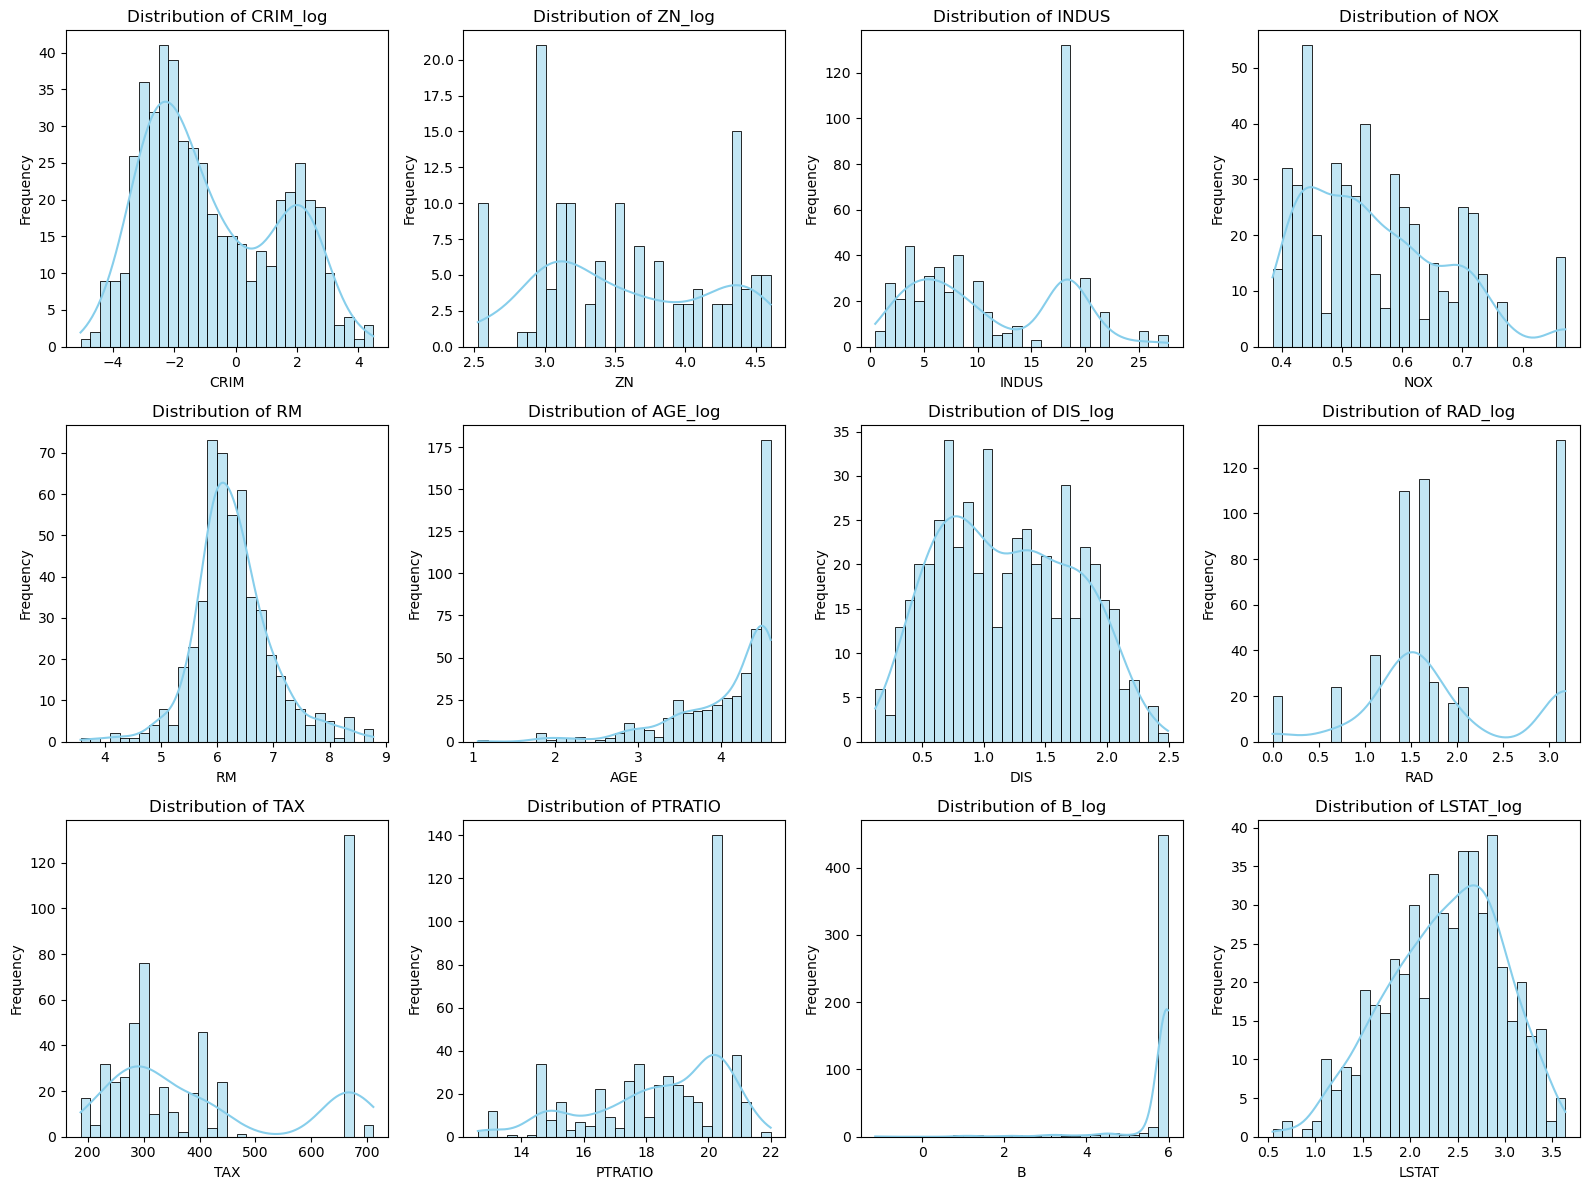

In [43]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(num_vari, 1):

    if col in for_log:
        plt.subplot(3, 4, i)  # 3행 4열 subplot
        sns.histplot(boston[col+'_log'], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col}_log')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:
        plt.subplot(3, 4, i)  # 3행 4열 subplot
        sns.histplot(boston[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Axes: >

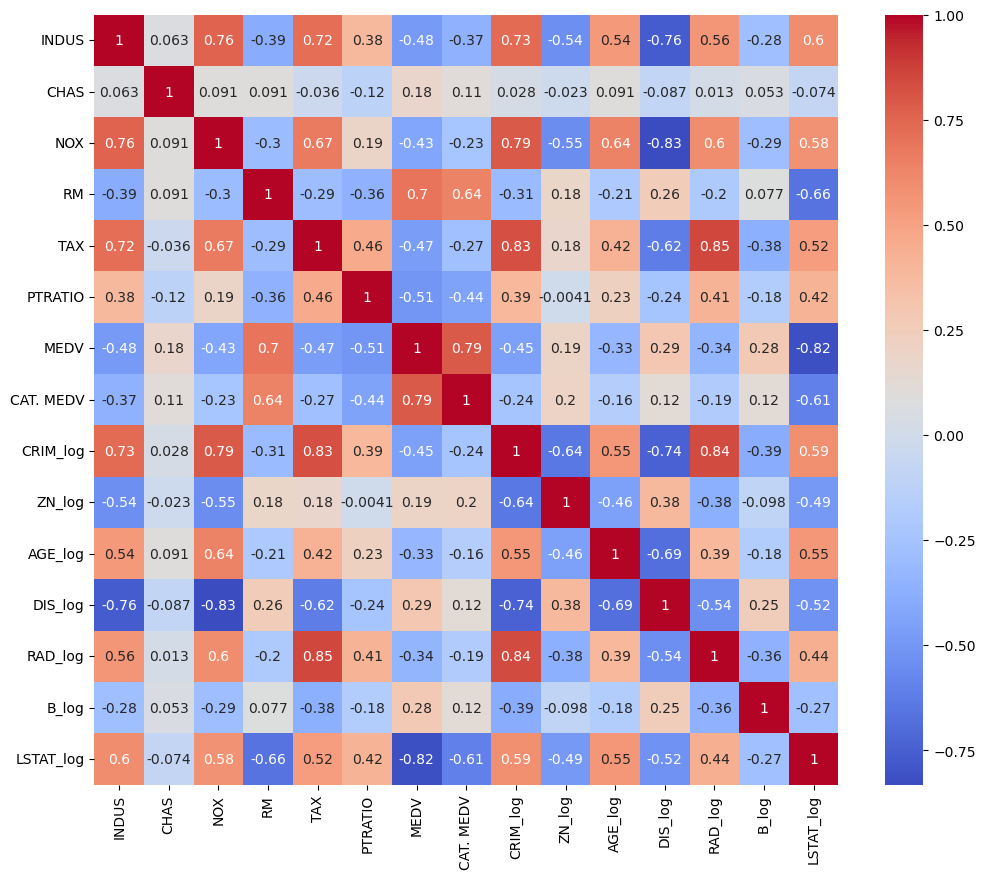

In [61]:
plt.figure(figsize=(12,10))
sns.heatmap(log_df.corr(), annot=True, cmap='coolwarm')

In [64]:
corr_matrix = log_df.corr()
medv_corr = corr_matrix['MEDV']

# 절대값 기준으로 0.4 이상인 변수만 필터링 (단, 자기 자신은 제외)
filtered_vars = medv_corr[(medv_corr <= -0.4) | (medv_corr >= 0.4)].drop('MEDV')
filtered_vars = filtered_vars.drop('CAT. MEDV')

print(filtered_vars)

INDUS       -0.483725
NOX         -0.427321
RM           0.695360
TAX         -0.468536
PTRATIO     -0.507787
CRIM_log    -0.454302
LSTAT_log   -0.815442
Name: MEDV, dtype: float64


### 다중공선성 확인

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 분석할 변수들만 모아서 DataFrame 생성 (예: log_df에서 MEDV 제외하고)
X = boston.drop(columns=['MEDV', 'CAT. MEDV'])

# VIF 계산을 위한 빈 데이터프레임 생성
vif_data = pd.DataFrame()

# 각 변수에 대해 VIF 계산
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data['feature'] = X.columns
vif_data = vif_data.sort_values('VIF').reset_index(drop=True)

print(vif_data)

          VIF  feature
0    1.152952     CHAS
1    2.100373     CRIM
2    2.844013       ZN
3   11.102025    LSTAT
4   14.485758    INDUS
5   14.699652      DIS
6   15.167725      RAD
7   20.104943        B
8   21.386850      AGE
9   61.227274      TAX
10  73.894947      NOX
11  77.948283       RM
12  85.029547  PTRATIO


### 정규화

In [7]:
from patsy import dmatrix

X = pd.DataFrame(boston, columns=boston.columns)

formula = "scale(CRIM) + scale(ZN) + scale(LSTAT) + scale(INDUS) + scale(DIS) + scale(RAD) + scale(B) + scale(AGE) + scale(TAX) + scale(NOX) + scale(RM) + scale(PTRATIO) + C(CHAS) + 0"  
dfX = dmatrix(formula, X, return_type="dataframe")

dfy = pd.DataFrame(boston['MEDV'], columns=["MEDV"])

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()  
vif["VIF Factor"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]  
vif["features"] = dfX.columns  
vif = vif.sort_values("VIF Factor").reset_index(drop=True)  
vif

,VIF Factor,features
0,1.005118,C(CHAS)[0]
1,1.068877,C(CHAS)[1]
2,1.348521,scale(B)
3,1.792192,scale(CRIM)
4,1.799084,scale(PTRATIO)
5,1.933744,scale(RM)
6,2.298758,scale(ZN)
7,2.941491,scale(LSTAT)
8,3.100826,scale(AGE)
9,3.955945,scale(DIS)


In [8]:
dfX.head().T

,0,1,2,3,4
C(CHAS)[0],1.000000,1.000000,1.000000,1.000000,1.000000
C(CHAS)[1],0.000000,0.000000,0.000000,0.000000,0.000000
scale(CRIM),-0.419782,-0.417339,-0.417342,-0.416750,-0.412482
scale(ZN),0.284830,-0.487722,-0.487722,-0.487722,-0.487722
scale(LSTAT),-1.075562,-0.492439,-1.208727,-1.361517,-1.026501
scale(INDUS),-1.287909,-0.593381,-0.593381,-1.306878,-1.306878
scale(DIS),0.140214,0.557160,0.557160,1.077737,1.077737
scale(RAD),-0.982843,-0.867883,-0.867883,-0.752922,-0.752922
scale(B),0.441052,0.441052,0.396427,0.416163,0.441052
scale(AGE),-0.120013,0.367166,-0.265812,-0.809889,-0.511180


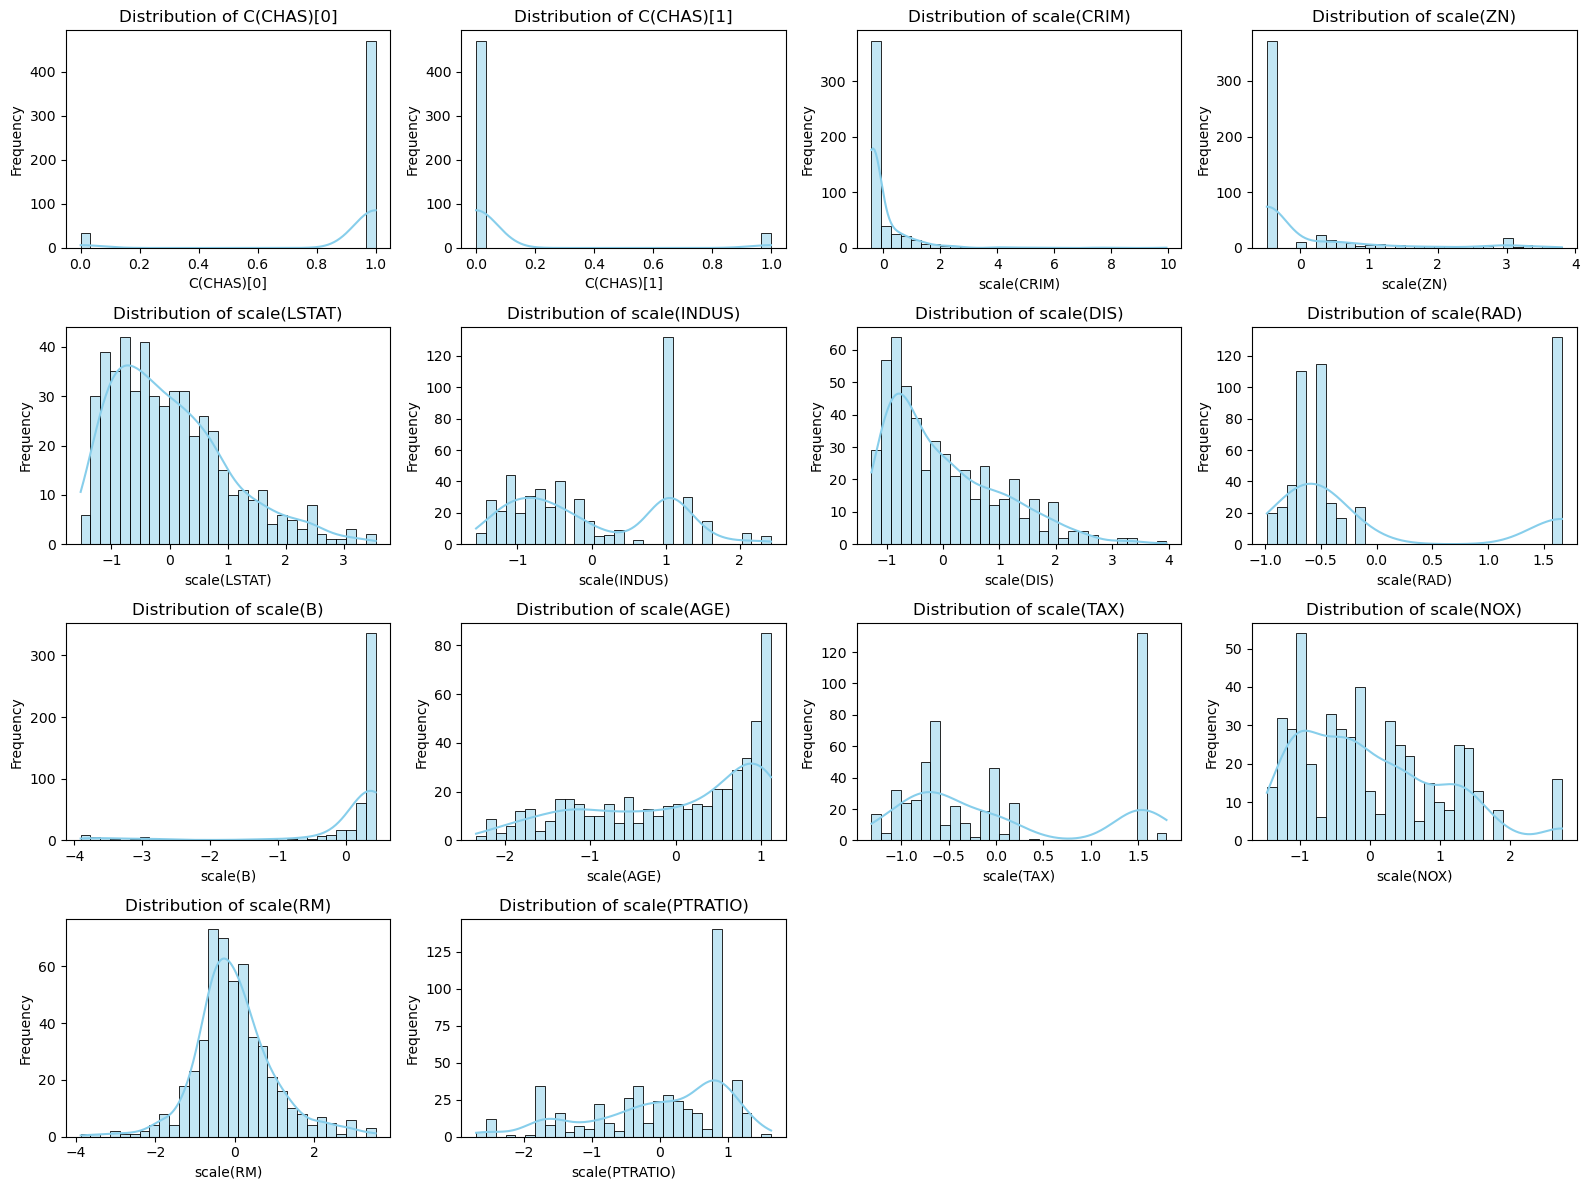

In [9]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(dfX.columns, 1):
    plt.subplot(4, 4, i)  # 3행 4열 subplot
    sns.histplot(dfX[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

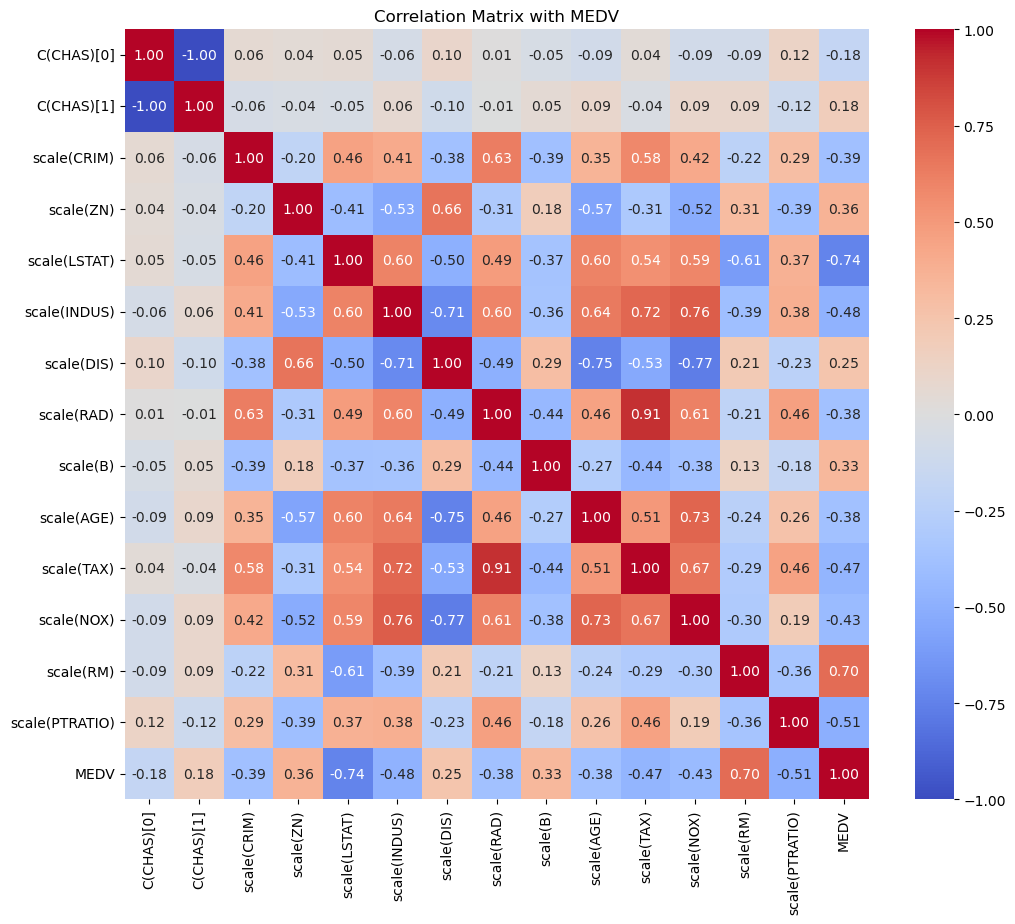

In [10]:
scaled_df = pd.concat([dfX, dfy], axis=1)

plt.figure(figsize=(12, 10))
sns.heatmap(scaled_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix with MEDV")
plt.show()

In [15]:
dfy.shape

(506, 1)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

lr = LinearRegression()
lr.fit(dfX, dfy)

coefficients = pd.DataFrame({
    'Attributes': dfX.columns,
    'Coefficients': lr.coef_.flatten()
})
coefficients

,Attributes,Coefficients
0,C(CHAS)[0],-1.343367
1,C(CHAS)[1],1.343367
2,scale(CRIM),-0.928146
3,scale(ZN),1.081569
4,scale(LSTAT),-3.743627
5,scale(INDUS),0.140900
6,scale(DIS),-3.104044
7,scale(RAD),2.662218
8,scale(B),0.849268
9,scale(AGE),0.019466


In [23]:
import statsmodels.api as sm

lm = sm.OLS(dfy, dfX.iloc[:, 2:])
lm_result = lm.fit()
print(lm_result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.105
Model:                            OLS   Adj. R-squared (uncentered):              0.083
Method:                 Least Squares   F-statistic:                              4.822
Date:                    목, 10 7 2025   Prob (F-statistic):                    1.62e-07
Time:                        12:02:26   Log-Likelihood:                         -2305.0
No. Observations:                 506   AIC:                                      4634.
Df Residuals:                     494   BIC:                                      4685.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------